# Market Research on Restaurant in Los Angeles

Anda telah memutuskan untuk membuka sebuah kafe kecil di Los Angeles. Kafe Anda bisa dibilang cukup unik, karena Anda "memperkerjakan" robot sebagai pelayan atau pramusaji. Proyek ini memang menjanjikan, namun membutuhkan modal yang besar. Oleh karena itu, Anda dan para mitra Anda memutuskan untuk menarik minat investor. Mereka tertarik dengan kondisi pasar saat ini.

Para mitra pun meminta Anda untuk mempersiapkan sejumlah riset pasar. Anda memiliki data dari sumber terbuka (open source) terkait jenis-jenis usaha tempat makan di LA.

# Tujuan

Proyek ini berfokus pada data storytelling untuk mengikat para investor berdasarkan data Market Research. Data dilakukan pre-processing untuk membersihkan dan merapihkan data agar dapat diolah. Kemudian dilakukan analisis data untuk menentukan peluang pengembangan usaha berbasis waralaba beserta rekomendasi tentang jenis usaha dan jumlah kursinya.

# Tahapan

Data proyek analisis bisnis ini disimpan dalam file <br>
`rest_data_us.csv` <br>
Proyek ini terdiri dari dua tahap: <br>
1. Pra-pemrosesan Data
2. Analisis Data Eksploratif (EDA)

## Pra-pemrosesan Data

### Memuat Data

In [1]:
# Import Library
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load Data
rest = pd.read_csv('/datasets/rest_data_us.csv')
rest

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6


**Mengecek data yang terduplikat**

In [3]:
rest.duplicated().sum()

0

**Mengecek nilai yang hilang**

In [4]:
rest.isna().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

**Menghapus Nilai yang hilang**

In [5]:
rest.dropna(inplace=True)

In [6]:
rest.isna().sum()

id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64

**Mengecek Info Tipe Data**

In [7]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9648 non-null   int64 
 1   object_name  9648 non-null   object
 2   address      9648 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9648 non-null   object
 5   number       9648 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 527.6+ KB


In [8]:
rest['id'] = rest['id'].astype('str')

In [9]:
rest.head(10)

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35


**Deskripsi rest_data:**

- `object_name` – nama usaha 
- `chain` – usaha berbasis WARALABA (TRUE/FALSE)
- `object_type` – jenis usaha
- `address` – alamat
- `number` – jumlah kursi
- `id` – ID unik

**Merapikan Kolom Address** 

In [10]:
!pip install usaddress

In [11]:
import usaddress 

In [12]:
usaddress.parse('3708 N EAGLE ROCK BLVD')

[('3708', 'AddressNumber'),
 ('N', 'StreetNamePreDirectional'),
 ('EAGLE', 'StreetName'),
 ('ROCK', 'StreetName'),
 ('BLVD', 'StreetNamePostType')]

In [13]:
def cleaning_check(raw):
    raw_address = usaddress.parse(raw)
    dict_address = {}
    for i in raw_address:
        dict_address.update({i[1]:i[0]})
    # Checks for normal case with street and number    
    if 'StreetName' in dict_address.keys() and 'AddressNumber' in dict_address.keys():
        clean_address = dict_address['AddressNumber'] + "," + str(dict_address['StreetName'])
        return clean_address
    else:
        return 'no street or number'

In [14]:
rest['clean_street_check'] = rest.address.apply(cleaning_check)

In [15]:
rest.head(10)

,id,object_name,address,chain,object_type,number,clean_street_check
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,"3708,ROCK"
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,"100,WORLD"
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,"6801,HOLLYWOOD"
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,"1814,SUNSET"
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,"2100,PARK"
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14,"10004,NATIONAL"
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100,"100,WORLD"
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7,"3500,6TH"
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1,"3027,FERNANDO"
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35,"3707,CAHUENGA"


In [16]:
def get_address_name(raw):
    raw_address = usaddress.parse(raw)
    dict_address = {}
    for i in raw_address:
        dict_address.update({i[1]:i[0]})
    # Checks for normal case with street and number    
    if 'StreetName' in dict_address.keys() and 'AddressNumber' in dict_address.keys():
        clean_address = str(dict_address['StreetName'])
        return clean_address
    else:
        return 'no street or number'

In [17]:
rest['street_name'] = rest.address.apply(get_address_name)

In [18]:
def cleaning_final(raw):
    if raw.startswith('OLVERA'):
        clean_address = 'OLVERA,Los Angeles,USA'
    elif raw.startswith('1033 1/2 LOS ANGELES'):
        clean_address = '1033 1/2 LOS ANGELES ST,Los Angeles,USA'
    else:
        raw_address = usaddress.parse(raw)
        dict_address = {}
        for i in raw_address:
            dict_address.update({i[1]:i[0]})
        clean_address = dict_address['AddressNumber'] + " " + str(dict_address['StreetName']) + str(', Los Angeles,USA')
    return clean_address

rest['clean_street_final'] = rest.address.apply(cleaning_final)
rest.sample(10)

,id,object_name,address,chain,object_type,number,clean_street_check,street_name,clean_street_final
9093,20879,LA POTRANCA BAR,12821 VENICE BLVD,True,Bar,17,"12821,VENICE",VENICE,"12821 VENICE, Los Angeles,USA"
558,12344,LA FLOR DE YUCATAN BAKERY DE,1800 S HOOVER ST,True,Bakery,6,"1800,HOOVER",HOOVER,"1800 HOOVER, Los Angeles,USA"
5789,17575,STARBUCKS COFFEE #5738,11155 SANTA MONICA BLVD,True,Cafe,28,"11155,MONICA",MONICA,"11155 MONICA, Los Angeles,USA"
4662,16448,PANDA EXPRESS #175,308 WESTWOOD PLZ,True,Fast Food,5,"308,WESTWOOD",WESTWOOD,"308 WESTWOOD, Los Angeles,USA"
5905,17691,THE COFFEE BEAN & TEA LEAF,1500 WESTWOOD BLVD,True,Cafe,48,"1500,WESTWOOD",WESTWOOD,"1500 WESTWOOD, Los Angeles,USA"
1411,13197,CAFE ANZIO,807 E 12TH ST STE 249,False,Restaurant,47,"807,12TH",12TH,"807 12TH, Los Angeles,USA"
7667,19453,YANG CHOW RESTAURANT,819 N BROADWAY,True,Restaurant,72,"819,BROADWAY",BROADWAY,"819 BROADWAY, Los Angeles,USA"
919,12705,DONUT EXPRESS,425 E IMPERIAL HWY UNIT #A,False,Fast Food,14,"425,IMPERIAL",IMPERIAL,"425 IMPERIAL, Los Angeles,USA"
2152,13938,ENZO & ANGELA,11701 WILSHIRE BLVD STE #12,False,Restaurant,34,"11701,WILSHIRE",WILSHIRE,"11701 WILSHIRE, Los Angeles,USA"
2306,14092,JANG AN RESTAURANT,2773 W OLYMPIC BLVD,True,Restaurant,1,"2773,OLYMPIC",OLYMPIC,"2773 OLYMPIC, Los Angeles,USA"


In [19]:
# Add column "street_raw" 
rest['street_number_raw'] = rest['address']
rest[['street_number_raw','street_raw']] = rest['street_number_raw'].str.split(n = 1,expand = True)
rest= rest[['id','object_name','chain','object_type','number','clean_street_final','address','street_raw','street_name']]
rest.head()

,id,object_name,chain,object_type,number,clean_street_final,address,street_raw,street_name
0,11786,HABITAT COFFEE SHOP,False,Cafe,26,"3708 ROCK, Los Angeles,USA",3708 N EAGLE ROCK BLVD,N EAGLE ROCK BLVD,ROCK
1,11787,REILLY'S,False,Restaurant,9,"100 WORLD, Los Angeles,USA",100 WORLD WAY # 120,WORLD WAY # 120,WORLD
2,11788,STREET CHURROS,False,Fast Food,20,"6801 HOLLYWOOD, Los Angeles,USA",6801 HOLLYWOOD BLVD # 253,HOLLYWOOD BLVD # 253,HOLLYWOOD
3,11789,TRINITI ECHO PARK,False,Restaurant,22,"1814 SUNSET, Los Angeles,USA",1814 W SUNSET BLVD,W SUNSET BLVD,SUNSET
4,11790,POLLEN,False,Restaurant,20,"2100 PARK, Los Angeles,USA",2100 ECHO PARK AVE,ECHO PARK AVE,PARK


In [20]:
rest[rest['street_raw'].str.contains('WORLD WAY')]

,id,object_name,chain,object_type,number,clean_street_final,address,street_raw,street_name
1,11787,REILLY'S,False,Restaurant,9,"100 WORLD, Los Angeles,USA",100 WORLD WAY # 120,WORLD WAY # 120,WORLD
6,11792,CPK,False,Restaurant,100,"100 WORLD, Los Angeles,USA",100 WORLD WAY # 126,WORLD WAY # 126,WORLD
19,11805,DELTA SKY CLUB T3,False,Restaurant,103,"300 WORLD, Los Angeles,USA",300 WORLD WAY,WORLD WAY,WORLD
45,11831,LAXSUL COMPANY,False,Restaurant,45,"380 WORLD, Los Angeles,USA",380 WORLD WAY LVL6 SP5,WORLD WAY LVL6 SP5,WORLD
46,11832,THE COUNTER SPACE 7C,True,Restaurant,20,"700 WORLD, Los Angeles,USA",700 WORLD WAY,WORLD WAY,WORLD
...,...,...,...,...,...,...,...,...,...
9342,21128,ASHLAND HILL,False,Restaurant,21,"700 WORLD, Los Angeles,USA",700 WORLD WAY # 3158,WORLD WAY # 3158,WORLD
9359,21145,DUNKIN' DONUTS,True,Fast Food,21,"700 WORLD, Los Angeles,USA",700 WORLD WAY # 1104,WORLD WAY # 1104,WORLD
9399,21185,DELTA AIRLINE T3 LOUNGE,False,Restaurant,124,"300 WORLD, Los Angeles,USA",300 WORLD WAY,WORLD WAY,WORLD
9416,21202,PF CHANG'S SUSHI & BAR,False,Bar,13,"380 WORLD, Los Angeles,USA",380 WORLD WAY # T73,WORLD WAY # T73,WORLD


In [21]:
rest.head(10)

,id,object_name,chain,object_type,number,clean_street_final,address,street_raw,street_name
0,11786,HABITAT COFFEE SHOP,False,Cafe,26,"3708 ROCK, Los Angeles,USA",3708 N EAGLE ROCK BLVD,N EAGLE ROCK BLVD,ROCK
1,11787,REILLY'S,False,Restaurant,9,"100 WORLD, Los Angeles,USA",100 WORLD WAY # 120,WORLD WAY # 120,WORLD
2,11788,STREET CHURROS,False,Fast Food,20,"6801 HOLLYWOOD, Los Angeles,USA",6801 HOLLYWOOD BLVD # 253,HOLLYWOOD BLVD # 253,HOLLYWOOD
3,11789,TRINITI ECHO PARK,False,Restaurant,22,"1814 SUNSET, Los Angeles,USA",1814 W SUNSET BLVD,W SUNSET BLVD,SUNSET
4,11790,POLLEN,False,Restaurant,20,"2100 PARK, Los Angeles,USA",2100 ECHO PARK AVE,ECHO PARK AVE,PARK
5,11791,THE SPOT GRILL,False,Restaurant,14,"10004 NATIONAL, Los Angeles,USA",10004 NATIONAL BLVD,NATIONAL BLVD,NATIONAL
6,11792,CPK,False,Restaurant,100,"100 WORLD, Los Angeles,USA",100 WORLD WAY # 126,WORLD WAY # 126,WORLD
7,11793,PHO LALA,False,Restaurant,7,"3500 6TH, Los Angeles,USA",3500 W 6TH ST STE 226,W 6TH ST STE 226,6TH
8,11794,ABC DONUTS,True,Fast Food,1,"3027 FERNANDO, Los Angeles,USA",3027 N SAN FERNANDO RD UNIT 103,N SAN FERNANDO RD UNIT 103,FERNANDO
9,11795,UPSTAIRS,False,Restaurant,35,"3707 CAHUENGA, Los Angeles,USA",3707 N CAHUENGA BLVD,N CAHUENGA BLVD,CAHUENGA


## Analisis Data Eksploratif (EDA)

### Proporsi Berbagai Usaha

In [22]:
# Mengecek berbagai Jenis Usaha 
rest.object_type.unique()

array(['Cafe', 'Restaurant', 'Fast Food', 'Bakery', 'Bar', 'Pizza'],
      dtype=object)

In [23]:
# Menghitung Jumlah usaha berdasarkan object_type
rest_by_object = rest.object_type.value_counts().reset_index()

In [24]:
rest_by_object

,index,object_type
0,Restaurant,7253
1,Fast Food,1066
2,Cafe,435
3,Pizza,319
4,Bar,292
5,Bakery,283


In [25]:
rest_data= rest.groupby('object_type').agg({'id':'nunique'}).reset_index()
rest_data.columns = ['type','rest_count']
rest_data['rest_part'] = round(100*rest_data['rest_count']/rest_data.rest_count.sum())
rest_data.sort_values('rest_part', axis=0, ascending=True)

,type,rest_count,rest_part
0,Bakery,283,3.0
1,Bar,292,3.0
4,Pizza,319,3.0
2,Cafe,435,5.0
3,Fast Food,1066,11.0
5,Restaurant,7253,75.0


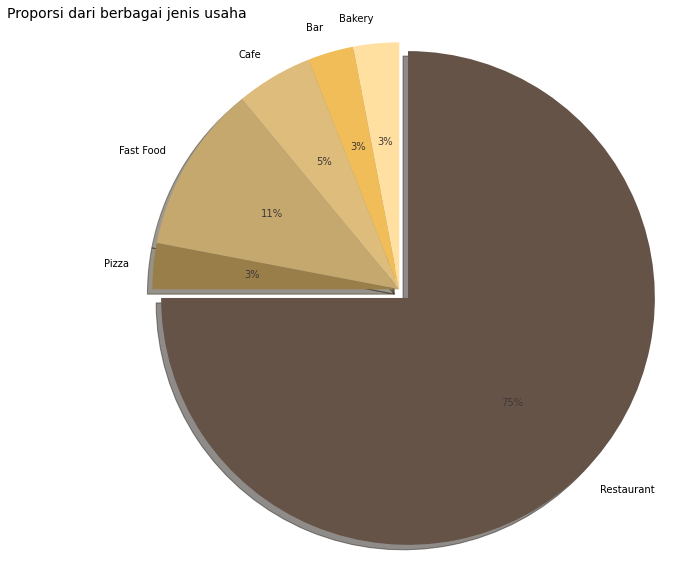

In [26]:
pie_colors = ["#ffe0a1", "#f0bd59", "#debd7c", "#c4a86e", "#997e49", "#665347"]

labels = rest_data.type
sizes = rest_data.rest_part
explode = (0,0,0,0,0,0.05)  

fig1, ax1 = plt.subplots(figsize=(10,10))
_, _, text = ax1.pie(sizes, explode = explode, labels = labels, autopct = '%0.0f%%',
                     shadow = True, startangle = 90, colors = pie_colors)

for t in text:
    t.set_color('#403838')

ax1.axis('equal')  

plt.title('Proporsi dari berbagai jenis usaha', fontdict={'size':14}).set_position([0, 1.05])

plt.show()

### Proporsi dari Waralaba dan Non-Waralaba

In [27]:
rest_type = rest.groupby(['object_type','chain']).agg({'id':'nunique'}).reset_index()
rest_type.columns = ['type','chain','rest_count']
rest_type['rest_part'] = round(100*rest_type['rest_count']/rest_type.rest_count.sum())

# Mengubah kolom chain dari True False menjadi Chain atau Not-Chain Values
rest_type['chain'] = rest_type['chain'].astype(str).replace({'True':'Chain','False':'Not-Chain'})

In [28]:
rest_type_chain = rest.pivot_table(index='object_type', columns='chain', values='id', aggfunc='count' )

In [29]:
rest_type_t = rest_type_chain.T
rest_type_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, False to True
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Bakery      1 non-null      float64
 1   Bar         2 non-null      float64
 2   Cafe        2 non-null      float64
 3   Fast Food   2 non-null      float64
 4   Pizza       2 non-null      float64
 5   Restaurant  2 non-null      float64
dtypes: float64(6)
memory usage: 112.0+ bytes


object_type,Bakery,Bar,Cafe,Fast Food,Pizza,Restaurant
chain,,,,,,
False,NaN,3.600134,2.829873,7.719357,2.779638,83.070998
True,7.698585,2.094668,7.236126,16.458107,4.162133,62.350381


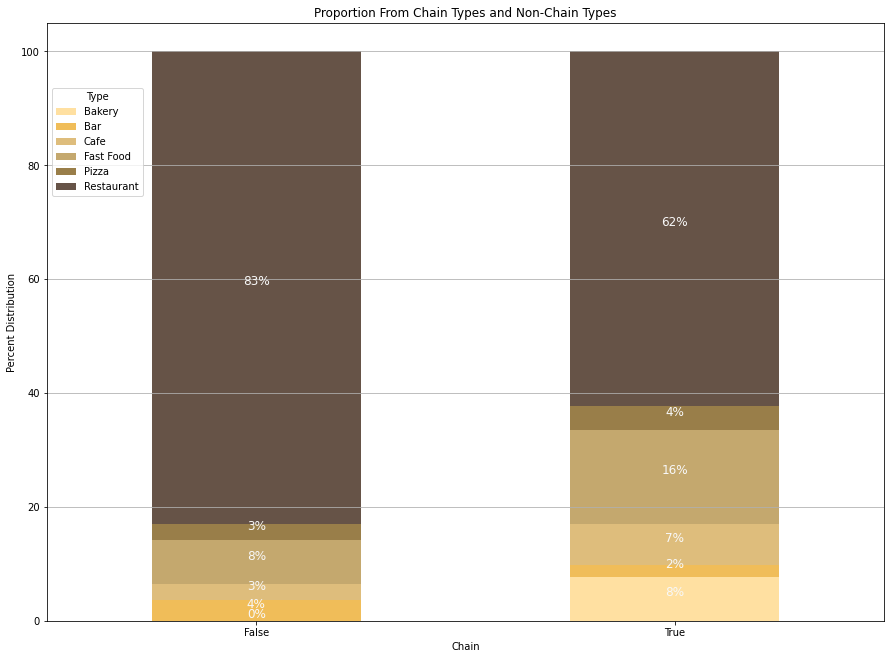

In [30]:
bar_colors = ["#ffe0a1", "#f0bd59", "#debd7c", "#c4a86e", "#997e49", "#665347"]

ax = rest_type_t.apply(lambda r: r/r.sum()*100, axis = 1)
ax_1 = ax.plot.bar(figsize = (15,11),stacked = True, rot = 0, color = bar_colors)
display(ax)

plt.legend(loc = 'upper center', bbox_to_anchor = (0.06, 0.9), title = "Type")

plt.xlabel('Chain')
plt.ylabel('Percent Distribution')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              color = '#F8F8F8',
              fontsize=12,
              ha = 'center', 
              va = 'bottom')
plt.title('Proportion From Chain Types and Non-Chain Types')
plt.grid(axis = 'y')
plt.show()

**Kesimpulan Sementara:** <br>
- Restoran nonwaralaba lebih banyak jika dibandingkan restoran waralaba
- Semua Toko Roti berbentuk waralaba, dan 0% merupakan non waralaba, yang berarti semua toko bakery merupakan usaha franchise waralaba

### Jenis Usaha yang berbasis waralaba

In [31]:
chain = pd.pivot_table(rest, values='object_name', index='object_type',columns=['chain'], aggfunc='count')
chain = chain.fillna(0)
chain

chain,False,True
object_type,,
Bakery,0.0,283.0
Bar,215.0,77.0
Cafe,169.0,266.0
Fast Food,461.0,605.0
Pizza,166.0,153.0
Restaurant,4961.0,2292.0


In [32]:
chain['ratio'] = chain[True]/(chain[True]+chain[False])
chain

chain,False,True,ratio
object_type,,,
Bakery,0.0,283.0,1.000000
Bar,215.0,77.0,0.263699
Cafe,169.0,266.0,0.611494
Fast Food,461.0,605.0,0.567542
Pizza,166.0,153.0,0.479624
Restaurant,4961.0,2292.0,0.316007


**Ciri-Ciri dari jenis usaha berbasis waralaba**

**Hubungan Jumlah Kursi dengan jenis waralaba dan Non-Waralaba**

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


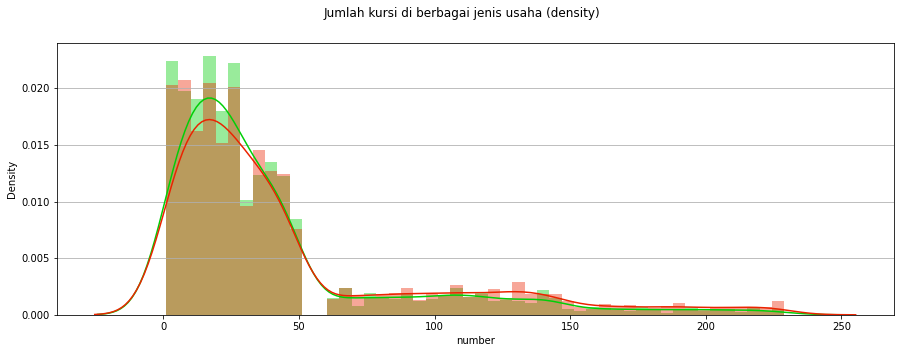

In [33]:
seats_chain_true=rest.query('chain == True')['number']
seats_chain_false=rest.query('chain == False')['number']
plt.figure(figsize = (15,5))
lst1 = seats_chain_true
lst2 = seats_chain_false
plt.grid(axis = 'y')
sns.distplot(lst1,label = 'number of seats', color = "#00cf07")
sns.distplot(lst2,label = 'number of seats',color = "#eb2300")
#plt.subplots_adjust(top=0.9)
plt.suptitle('Jumlah kursi di berbagai jenis usaha (density)')
plt.show()

In [34]:
table = pd.pivot_table(data=rest_type,index=['type'], columns='chain')
table

rest_count           rest_part          
chain           Chain Not-Chain     Chain Not-Chain
type                                               
Bakery          283.0       NaN       3.0       NaN
Bar              77.0     215.0       1.0       2.0
Cafe            266.0     169.0       3.0       2.0
Fast Food       605.0     461.0       6.0       5.0
Pizza           153.0     166.0       2.0       2.0
Restaurant     2292.0    4961.0      24.0      51.0

<AxesSubplot:ylabel='object_type'>

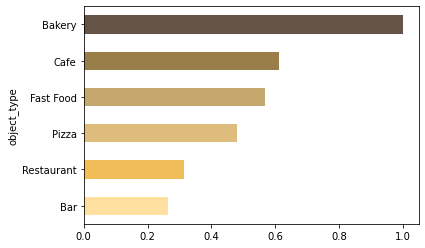

In [35]:
ratio_color = ["#ffe0a1", "#f0bd59", "#debd7c", "#c4a86e", "#997e49", "#665347"]
ratio_chain = chain['ratio'].sort_values(ascending=True)
ratio_chain.plot(kind='barh', color= ratio_color)

**Kesimpulan Sementara:** <br>
- Jenis usaha Bakery 100% berbasis waralaba
- Hanya 60% dari total usaha cafe yang berbasis waralaba
- Hanya 56% dari total usaha Fast Food yang berbasis waralaba
- Hanya 47% dari total usaha pizza yang berbasis waralaba
- Hanya 31% dari total usaha restoran yang berbasis waralaba
- Hanya 26% dari total usaha Bar yang berbasis waralaba

### Jumlah kursi rata-rata untuk tiap jenis usaha

In [36]:
chair_average = rest.groupby('object_type').agg(kursi_rata_rata = ('number','mean'))
chair_average

,kursi_rata_rata
object_type,
Bakery,21.773852
Bar,44.767123
Cafe,25.000000
Fast Food,31.837711
Pizza,28.545455
Restaurant,48.048807


In [37]:
chair_shorted = chair_average.sort_values(by='kursi_rata_rata',ascending=False)

<AxesSubplot:xlabel='object_type'>

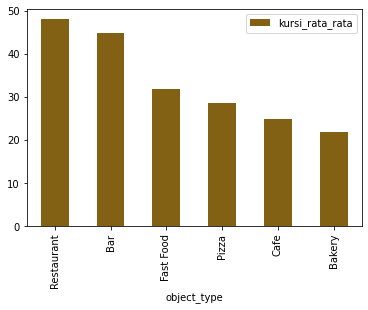

In [38]:
chair_shorted.plot(kind='bar',color ='#826115')

**Kesimpulan Sementara:** <br>
- Kursi rata rata terbanyak ada pada jenis usaha Restoran
- Kursi dengan rata-rata paling sedikit ada pada jenis usaha Bakery

In [39]:
rest.head()

,id,object_name,chain,object_type,number,clean_street_final,address,street_raw,street_name
0,11786,HABITAT COFFEE SHOP,False,Cafe,26,"3708 ROCK, Los Angeles,USA",3708 N EAGLE ROCK BLVD,N EAGLE ROCK BLVD,ROCK
1,11787,REILLY'S,False,Restaurant,9,"100 WORLD, Los Angeles,USA",100 WORLD WAY # 120,WORLD WAY # 120,WORLD
2,11788,STREET CHURROS,False,Fast Food,20,"6801 HOLLYWOOD, Los Angeles,USA",6801 HOLLYWOOD BLVD # 253,HOLLYWOOD BLVD # 253,HOLLYWOOD
3,11789,TRINITI ECHO PARK,False,Restaurant,22,"1814 SUNSET, Los Angeles,USA",1814 W SUNSET BLVD,W SUNSET BLVD,SUNSET
4,11790,POLLEN,False,Restaurant,20,"2100 PARK, Los Angeles,USA",2100 ECHO PARK AVE,ECHO PARK AVE,PARK


In [40]:
rest_address_top = rest.groupby('street_name')['id'].count().reset_index()
rest_address_top_final = rest_address_top.sort_values(by='id',ascending=False)
rest_address_top_final = rest_address_top_final.head(10)
top_final_color = ["#ffe0a1", "#f0bd59", "#debd7c", "#c4a86e", "#997e49", "#665347"]

<BarContainer object of 10 artists>

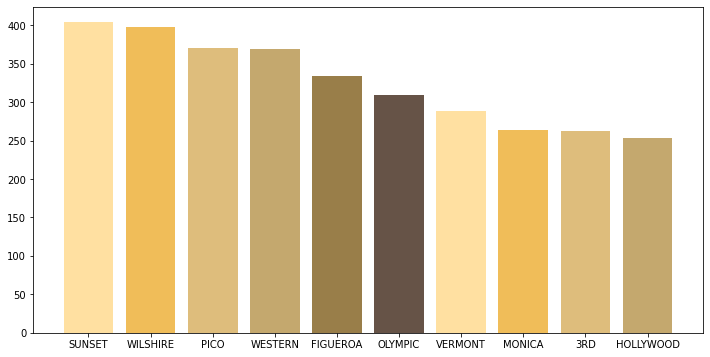

In [41]:
x = rest_address_top_final['street_name']
y = rest_address_top_final['id']
plt.figure(figsize=(12,6))
plt.bar(x,y , color = top_final_color)

In [42]:
one_business = rest_address_top[rest_address_top.id==1]
one_business

,street_name,id
0,103,1
2,10TH,1
4,11th,1
8,16TH,1
9,17TH,1
...,...,...
453,ZOO,1
454,hollywood,1
456,pico,1
457,sunset,1


# Tren Jumlah Kursi Untuk distribusi jalan yang Banyak Usaha

In [43]:
rest_street_raw = rest.query('object_type=="Restaurant"').groupby(['street_name']
                               ).agg({'id':'nunique', 'number':'mean'}).reset_index().sort_values(by ='id', ascending=False)
rest_street_raw.head(10)

,street_name,id,number
414,WILSHIRE,319,56.357367
369,SUNSET,297,53.319865
407,WESTERN,292,44.369863
319,PICO,283,43.593640
303,OLYMPIC,257,52.533074
167,FIGUEROA,234,48.162393
386,VERMONT,218,48.752294
20,3RD,207,43.057971
282,MONICA,204,36.921569
213,HOLLYWOOD,197,63.137056


In [44]:
rest_street_raw.columns = ['street','n_rest','average_seat']
top10 = rest_street_raw.head(10)
top10


,street,n_rest,average_seat
414,WILSHIRE,319,56.357367
369,SUNSET,297,53.319865
407,WESTERN,292,44.369863
319,PICO,283,43.593640
303,OLYMPIC,257,52.533074
167,FIGUEROA,234,48.162393
386,VERMONT,218,48.752294
20,3RD,207,43.057971
282,MONICA,204,36.921569
213,HOLLYWOOD,197,63.137056


In [45]:
rest_street_raw[rest_street_raw['n_rest']==1]['street'].nunique()

179

In [46]:
rest_street_raw_seats = rest.query('object_type=="Restaurant"').groupby(['street_raw']
                               ).agg({'id':'nunique', 'number':'mean'}).reset_index().sort_values(by ='id', ascending=False)
rest_street_raw_seats.head(10)

,street_raw,id,number
2133,W PICO BLVD,218,45.215596
2184,W SUNSET BLVD,217,55.705069
471,HOLLYWOOD BLVD,136,58.441176
2302,WILSHIRE BLVD,131,67.068702
1757,W 3RD ST,119,47.655462
1550,SANTA MONICA BLVD,107,35.158879
2058,W OLYMPIC BLVD,107,59.644860
1379,S VERMONT AVE,107,47.841121
613,MELROSE AVE,106,55.216981
125,BEVERLY BLVD,103,51.873786


In [47]:
rest_street_raw_seats.columns = ['street','n_rest','average']
raw_top10 = rest_street_raw_seats.head(10)
raw_top10

,street,n_rest,average
2133,W PICO BLVD,218,45.215596
2184,W SUNSET BLVD,217,55.705069
471,HOLLYWOOD BLVD,136,58.441176
2302,WILSHIRE BLVD,131,67.068702
1757,W 3RD ST,119,47.655462
1550,SANTA MONICA BLVD,107,35.158879
2058,W OLYMPIC BLVD,107,59.644860
1379,S VERMONT AVE,107,47.841121
613,MELROSE AVE,106,55.216981
125,BEVERLY BLVD,103,51.873786


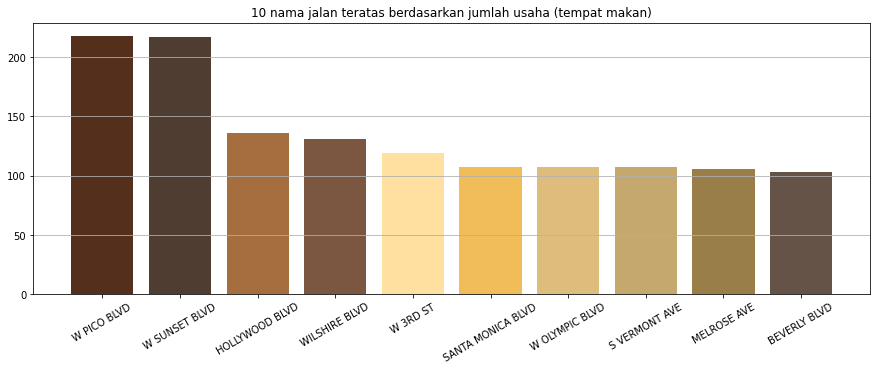

In [48]:
plt.figure(figsize = (15,5))
plt.title('10 nama jalan teratas berdasarkan jumlah usaha (tempat makan)')
y_pos = np.arange(len(top10.n_rest))
plt.bar(y_pos, raw_top10.n_rest,
        color = ["#532F1C", "#4F3D32", "#A56E3F", "#7B5742", "#ffe0a1", "#f0bd59", "#debd7c", "#c4a86e", "#997e49", "#665347"])
plt.xticks(y_pos, raw_top10.street)
plt.xticks(rotation = 30)
plt.grid(axis = 'y')
plt.show()

In [49]:
rest_street_raw_seats.columns = ['street_name','n_rest','average_seat']
top15 = rest_street_raw_seats.head(15)
top15 = top15.sort_values(by = 'average_seat', ascending = False)

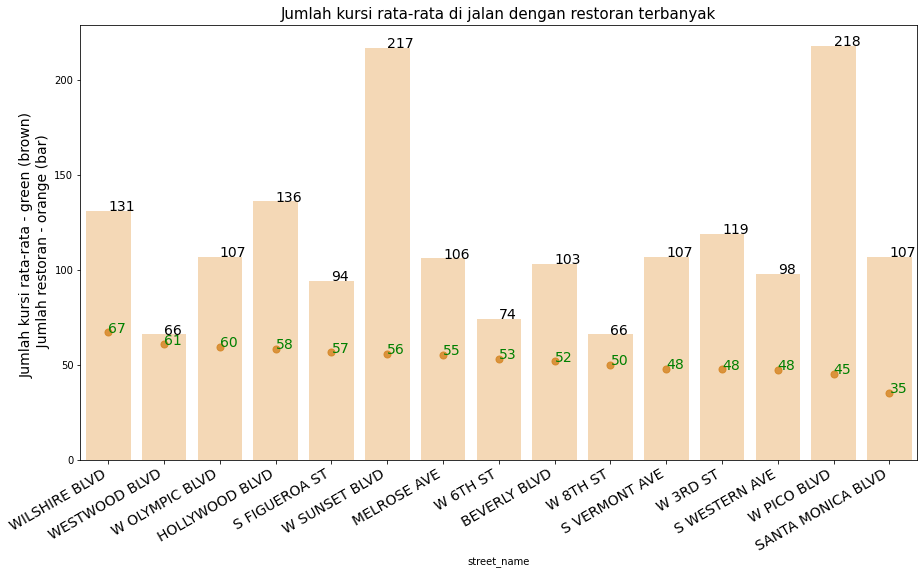

In [50]:
fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(x = top15.street_name, y = top15.average_seat, s=50, color='#c96f00', alpha=0.8)
sns.barplot(x = top15.street_name, 
            y = top15.n_rest, 
            color = '#ffa230', 
            alpha = 0.4)
ax.set_title(
    'Jumlah kursi rata-rata di jalan dengan restoran terbanyak', fontdict = {'size':15})
ax.set_ylabel(
    'Jumlah kursi rata-rata - green (brown) \n Jumlah restoran - orange (bar)', fontdict = {'size':14})
ax.set_xticks(top15.street_name)
ax.set_xticklabels(
    top15.street_name,
    rotation = 30,
    fontdict = {'horizontalalignment':'right','size':14}
)
for row in top15.itertuples():
    ax.text(
        row.street_name, row.average_seat, 
        s = round(row.average_seat), 
        color = 'green',
        fontdict = {'size':14}
    ),
    ax.text(
        row.street_name, 
        row.n_rest, 
        s = round(row.n_rest),
        fontdict = {'size':14}
    ) 

**Kesimpulan** <br>
- Berdasarkan data dari 15 jalan dengan restoran terbanyak, rata-rata tertinggi jumlah<br>
  kursi yaitu di jalan Wilshire boulevards (67), Westwood boulevard (61), dan W Olympic boulevard (60).

## Kesimpulan Umum

### Pra-Pemrosesan

Dari eksplorasi pra-pemrosesan data, dapat disimpulkan bahwa:

- Data menyangkut data terkait jenis usaha tempat makan di LA. Missing value hanya terdapat 3 data dan dapat diisi dengan nilai False karena setelah diteliti bukan merupakan toko waralaba. Apabila ada kesalahanpun tidak akan mempengaruhi keseluruhan data secara impact.
- Duplikat data tidak ditemukan.
- Untuk mempermudah analisis data, dilakukan import alamat US. Kemudian dibuat fungsi untuk mendekonstruksi jalan sehingga didapatkan nama dan nomor jalan untuk mendapatkan alamat yang bersih.

### Analisis Data Eksploratif

Dari analisis data eksploratif, dapat disimpulkan bahwa: <br>
- Secara proporsi dari berbagai jenis usaha, 75% adalah restoran, 11% adalah makanan cepat saji, 5% adalah kafe, dan 3% adalah toko roti, bar, dan tempat pizza.
- Proporsi dari berbagai jenis usaha, usaha tempat makan nonwaralaba memiliki tingkat tertinggi (83%). Sedangkan tempat makan waralaba yaitu 62%. Kafe waralaba sebanyak 7% dan nonwaralaba 3%. Insight yang menarik adalah toko roti dengan memiliki 8% toko waralaba dan 0% nonwaralaba. Artinya tidak ada toko roti nonwaralaba
- Jenis usaha yang berbasis waralaba diketahui sebanyak 63% restoran, fast-food (16%), toko roti (8%) dan kafe (7%).
- Karakteristik jenis usaha waralaba diketahui terdapat 203 jenis jumlah kursi disetiap rumah makan waralaba. Ada jenis usaha yang hanya memiliki 1 kursi hingga 229 kursi. Rata-rata jenis usaha memiliki 39 kursi. 25% dari restoran waralaba memiliki 13 kursi, 50% memiliki 25 kursi dan 75% memiliki 44 kursi.
- Data menunjukkan bahwa banyak rumah makan memiliki jumlah kursi yang sedikit yaitu dibawah 50 kursi. Hanya sedikit tempat yang memiliki banyak kursi.
- Rata-rata jumlah kursi di berbagai jenis usaha di rumah makan (48), bar (44), fast-food (32), tempat pizza (28), kafe (25), dan toko roti (22)
- Terdapat 85 nama jalan unik berdasarkan analisis alamat AS.
- Menurut data, top 10 jalan dengan jumlah restoran terbanyak yaitu dipegang oleh 4 di jalan boulevard yaitu West Pico, West Sunset, Hollywood, dan Wilshire dengan 218, 217, 136 dan 131 restaurants secara berurutan.
- Terdapat 179 jalan yang hanya memiliki 1 rumah makan. Dengan mengabaikan nama awalan jalan.
- Di antara 20 jalan dengan jumlah restoran terbanyak, rata-rata jumlah kursi terbanyak ada di jalan Wilshire boulevards (67), Westwood boulevard (61), dan W Olympic boulevard (60).

**Link Presentasi:** <br>
    

https://drive.google.com/file/d/1a4CNZsqxNuzL7O3TA3iTc65wIR3elKGW/view?usp=sharing